In [130]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 

from PIL import Image, ImageDraw, ImageFont
import tensorflow as tf
from os import listdir
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [92]:
def read_file(dir:str):
    list = []
    for f in listdir(dir):
        list.append(cv2.imread(dir+f))
    return np.array([image.sum(axis=-1, keepdims=True) for image in list], dtype=np.uint8)
    #return np.array([(image.sum(axis=-1, keepdims=True)).reshape(-1) for image in list],dtype=np.uint8)

In [93]:
list1 = read_file("../resources/data/class_test/HERSHEY/")
list2 = read_file("../resources/data/class_test/SCRIPT/")

In [94]:
list2.shape

(69, 50, 200, 1)

In [95]:
x_train = np.concatenate([list1, list2])
x_train.shape

(138, 50, 200, 1)

In [100]:
y_train = np.concatenate([[0]*len(list1), [1]*len(list2)])
y_train.shape

(138,)

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.10, random_state=99)

In [106]:

tf.keras.backend.clear_session()
model = tf.keras.Sequential(
    [
        #tf.keras.layers.GaussianNoise(0.1, input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3,3), input_shape=(50, 200, 1), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3), strides=4),
        #tf.keras.layers.SpatialDropout2D(0.4),
        tf.keras.layers.Conv2D(48, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3), strides=4),
        #tf.keras.layers.SpatialDropout2D(0.4),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [102]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 198, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 47, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 12, 48)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 32)                3

In [107]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
4/4 [==============================] - 1s 85ms/step - loss: 6.4985 - accuracy: 0.6263 - val_loss: 5.4811 - val_accuracy: 0.7200
Epoch 2/10
4/4 [==============================] - 0s 14ms/step - loss: 1.0871 - accuracy: 0.8283 - val_loss: 1.6499 - val_accuracy: 0.8000
Epoch 3/10
4/4 [==============================] - 0s 14ms/step - loss: 0.3107 - accuracy: 0.9192 - val_loss: 0.1065 - val_accuracy: 0.9200
Epoch 4/10
4/4 [==============================] - 0s 13ms/step - loss: 0.0214 - accuracy: 0.9899 - val_loss: 0.3062 - val_accuracy: 0.8800
Epoch 5/10
4/4 [==============================] - 0s 14ms/step - loss: 0.0630 - accuracy: 0.9798 - val_loss: 0.1070 - val_accuracy: 0.9600
Epoch 6/10
4/4 [==============================] - 0s 13ms/step - loss: 0.0131 - accuracy: 0.9899 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 14ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 8/10
4/4 [===========

In [108]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 40ms/step - loss: 0.0197 - accuracy: 1.0000


[0.019744334742426872, 1.0]

In [126]:
model.predict(np.array(x_test[5]).reshape(1,50,200,1))

1/1 [==============================] - 0s 17ms/step


array([[0.999956]], dtype=float32)

In [123]:
np.array(x_test[0]).reshape(1,50,200,1).shape

(1, 50, 200, 1)

In [125]:
y_test

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

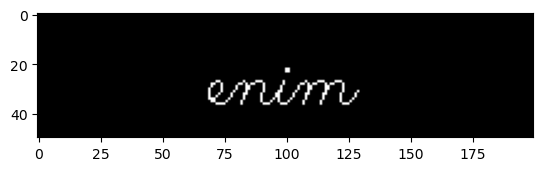

In [129]:
plt.imshow(x_test[7], cmap='gray')
plt.show()

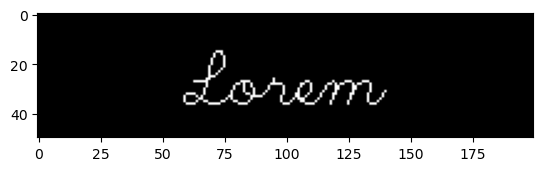

In [18]:
plt.imshow(list2[0], cmap='gray')
plt.show()